In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Housing.csv')
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [ ]:
print("\nDataset shape:", df.shape)
print("\nColumn names:", df.columns.tolist())


Dataset shape: (545, 13)

Column names: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


In [ ]:
print("\nMissing values:")
print(df.isnull().sum())
print("\nData types:")
print(df.dtypes)

categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in categorical_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

df['furnishingstatus'] = df['furnishingstatus'].map({
    'unfurnished': 0,
    'semi-furnished': 1,
    'furnished': 2
})

print("\nAfter converting categorical variables:")
print(df.head())


Missing values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Data types:
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

After converting categorical variables:
      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2  

In [ ]:
X_simple = df[['area']]
y = df['price']

print(f"\nSimple model: Predicting price from area")
print(f"X shape: {X_simple.shape}")
print(f"y shape: {y.shape}")

X_complex = df.drop('price', axis=1)
print(f"\nComplex model: Predicting price from all features")
print(f"X shape: {X_complex.shape}")


Simple model: Predicting price from area
X shape: (545, 1)
y shape: (545,)

Complex model: Predicting price from all features
X shape: (545, 12)


In [ ]:
X_train_simple, X_test_simple, y_train, y_test = train_test_split(
    X_simple, y, test_size=0.2, random_state=42
)

X_train_complex, X_test_complex, y_train_complex, y_test_complex = train_test_split(
    X_complex, y, test_size=0.2, random_state=42
)

print(f"\nSimple model split:")
print(f"Training samples: {X_train_simple.shape[0]}")
print(f"Testing samples: {X_test_simple.shape[0]}")

print(f"\nComplex model split:")
print(f"Training samples: {X_train_complex.shape[0]}")
print(f"Testing samples: {X_test_complex.shape[0]}")


Simple model split:
Training samples: 436
Testing samples: 109

Complex model split:
Training samples: 436
Testing samples: 109


In [ ]:
# Train linear regression models
simple_model = LinearRegression()
complex_model = LinearRegression()

simple_model.fit(X_train_simple, y_train)
complex_model.fit(X_train_complex, y_train_complex)

print("Trained simple model (price ~ area) and complex model (price ~ all features).")
print(f"Simple model coefficient for area: {simple_model.coef_[0]:.2f}")
print(f"Simple model intercept: {simple_model.intercept_:.2f}")
print(f"Complex model coefficients: {len(complex_model.coef_)} features")


Training simple model (price ~ area)...

Training complex model (price ~ all features)...

Simple model coefficient (for area): 425.73
Simple model intercept: 2512254.26

Complex model has 12 coefficients


In [ ]:
y_pred_simple = simple_model.predict(X_test_simple)
y_pred_complex = complex_model.predict(X_test_complex)

results_simple = pd.DataFrame({
    "actual": y_test.reset_index(drop=True),
    "pred_simple": y_pred_simple
}).head(5)

results_complex = pd.DataFrame({
    "actual": y_test_complex.reset_index(drop=True),
    "pred_complex": y_pred_complex
}).head(5)

print("Sample predictions (simple model)")
print(results_simple)
print("\nSample predictions (complex model)")
print(results_complex)


First 5 predictions (Simple model - Area only):
Actual Price		Predicted Price
4060000		5024060
6650000		5279498
3710000		4232203
6440000		4640903
2800000		4198144

First 5 predictions (Complex model - All features):
Actual Price		Predicted Price
4060000		5203692
6650000		7257004
3710000		3062829
6440000		4559592
2800000		3332932


In [ ]:
mse_simple = mean_squared_error(y_test, y_pred_simple)
mae_simple = mean_absolute_error(y_test, y_pred_simple)
rmse_simple = np.sqrt(mse_simple)

mse_complex = mean_squared_error(y_test_complex, y_pred_complex)
mae_complex = mean_absolute_error(y_test_complex, y_pred_complex)
rmse_complex = np.sqrt(mse_complex)

r2_simple = simple_model.score(X_test_simple, y_test)
r2_complex = complex_model.score(X_test_complex, y_test_complex)

print("Metrics (simple: area only)")
print(f"MSE: {mse_simple:,.2f} | MAE: {mae_simple:,.2f} | RMSE: {rmse_simple:,.2f} | R2: {r2_simple:.3f}")

print("\nMetrics (complex: all features)")
print(f"MSE: {mse_complex:,.2f} | MAE: {mae_complex:,.2f} | RMSE: {rmse_complex:,.2f} | R2: {r2_complex:.3f}")


MODEL EVALUATION RESULTS

SIMPLE MODEL (Price ~ Area only):
Mean Squared Error (MSE): 3,675,286,604,768.19
Mean Absolute Error (MAE): 1,474,748.13
Root Mean Squared Error (RMSE): 1,917,103.70

COMPLEX MODEL (Price ~ All features):
Mean Squared Error (MSE): 1,771,751,116,594.04
Mean Absolute Error (MAE): 979,679.69
Root Mean Squared Error (RMSE): 1,331,071.42

R-squared Score (Simple): 0.2729
R-squared Score (Complex): 0.6495


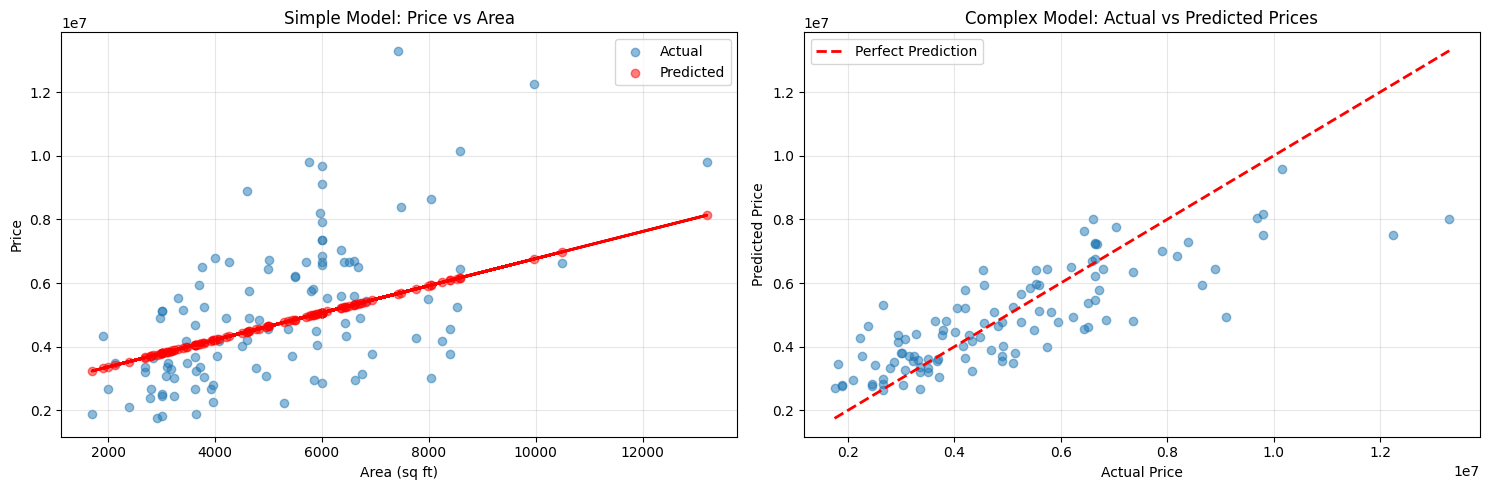


Visualization saved as 'prediction_results.png'


In [ ]:
import plotly.graph_objects as go
import plotly.express as px

order = np.argsort(X_test_simple['area'].values)
fig1 = go.Figure()
fig1.add_trace(go.Scatter(
    x=X_test_simple['area'].values,
    y=y_test,
    mode='markers',
    name='Actual',
    opacity=0.6
))
fig1.add_trace(go.Scatter(
    x=X_test_simple['area'].values[order],
    y=y_pred_simple[order],
    mode='lines',
    name='Predicted',
    line=dict(color='red')
))
fig1.update_layout(
    title='Price vs Area (simple model)',
    xaxis_title='Area (sq ft)',
    yaxis_title='Price'
)

fig2 = px.scatter(
    x=y_test_complex,
    y=y_pred_complex,
    opacity=0.6,
    labels={'x': 'Actual price', 'y': 'Predicted price'},
    title='Complex model parity plot'
)
fig2.add_trace(go.Scatter(
    x=fig2.data[0].x,
    y=fig2.data[0].x,
    mode='lines',
    name='Perfect prediction',
    line=dict(color='red', dash='dash')
))

fig1.show()
fig2.show()

print("Interactive plots shown (not saved). Use the toolbar to pan/zoom/hover.")

In [ ]:
print("\n=== Custom predictions ===")

example_small = pd.DataFrame({
    'area': [1200],
    'bedrooms': [2],
    'bathrooms': [1],
    'stories': [1],
    'mainroad': [1],
    'guestroom': [0],
    'basement': [0],
    'hotwaterheating': [0],
    'airconditioning': [1],
    'parking': [1],
    'prefarea': [0],
    'furnishingstatus': [1]
})

example_large = pd.DataFrame({
    'area': [2500],
    'bedrooms': [4],
    'bathrooms': [3],
    'stories': [2],
    'mainroad': [1],
    'guestroom': [1],
    'basement': [1],
    'hotwaterheating': [0],
    'airconditioning': [1],
    'parking': [2],
    'prefarea': [1],
    'furnishingstatus': [2]
})

pred_small = complex_model.predict(example_small)[0]
pred_large = complex_model.predict(example_large)[0]

print(f"Predicted price (small house): ₹{pred_small:,.0f}")
print(f"Predicted price (large house): ₹{pred_large:,.0f}")


MAKING PREDICTIONS FOR NEW HOUSES

Predicted price for small house (3000 sq ft): ₹29,124,753
Predicted price for large house (3000 sq ft): ₹8,685,045
